# Article analysis

## Imports

In [92]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas.core.common import flatten
import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [93]:
pd.set_option("max_colwidth", 0)

## Data sourcing

In [94]:
articles = pd.read_csv("./data/articles.csv")

articles.head()

,title,description,link,source
0,From Gemma Collins in the diary room to jokes about hyperventilating into a paper bag: A Level students flood social media with hilarious memes as they collect their exam results,"The long-awaited decision day at the end of the summer holidays has arrived - and with it many emotions, from jubilation to disappointment to grudging acceptance.",https://www.dailymail.co.uk/news/article-12416495/From-Gemma-Collins-diary-room-jokes-hyperventilating-paper-bag-Level-students-flood-social-media-hilarious-memes-collect-exam-results.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,Daily Mail
1,"How Michael Parkinson sparred with Muhammad Ali, fell out with Meg Ryan and enraged Helen Mirren: Talk show giant's greatest interviews as he dies at 88","Affectionately known simply as Parky, Sir Michael Parkinson was one of the world's greatest interviewers.",https://www.dailymail.co.uk/tvshowbiz/article-12416303/How-Michael-Parkinson-sparred-Muhammad-Ali-enraged-Helen-Mirren-fell-Meg-Ryan-Talk-giants-greatest-interviews-dies-88.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,Daily Mail
2,Pupils fume they've been 'completely screwed over' by return to pre-Covid marking after top grades drop by 9% in a year - while universities start to run out of Clearing places as thousands miss out on their preferred choices,This year's pupils who received their A-level results today did not sit GCSE exams two years ago and were awarded teacher-assessed grades amid the pandemic.,https://www.dailymail.co.uk/news/article-12416943/Pupils-fume-theyve-completely-screwed-level-results.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,Daily Mail
3,Moment Greek tennis star Stefanos Tsitsipas confronts woman in the crowd imitating a bee to put him off his stroke every time he serves…but he still wins the match,A woman has apologised after she was confronted by Stefanos Tsitsipas for imitating a bee in a bizarre incident during his match at the Cincinnati Masters.,https://www.dailymail.co.uk/news/article-12417041/Stefanos-Tsitsipas-confronts-woman-imitating-bee.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,Daily Mail
4,The Reckoning FIRST LOOK: Steve Coogan transforms into depraved presenter Jimmy Savile ahead of new series after BBC delayed broadcast over 'fierce response from victims',"The first official still for the new Jimmy Saville drama, The Reckoning, has been released ahead of its broadcast later this year.",https://www.dailymail.co.uk/tvshowbiz/article-12416995/The-Reckoning-LOOK-Steve-Coogan-transforms-depraved-presenter-Jimmy-Savile-ahead-new-series-BBC-delayed-broadcast-fierce-response-victims.html?ns_mchannel=rss&ito=1490&ns_campaign=1490,Daily Mail


## Most frequent words

### Processing

In [95]:
# Subset the data

title_df = articles[["title", "source"]].copy()

In [96]:
title_df["keywords"] = title_df["title"].str.lower()

In [97]:
# Split into tokens

title_df["keywords"] = title_df["keywords"].apply(word_tokenize)

In [98]:
# Filter out punctuation, stop words, and very short words

stops = stopwords.words("english")

# Add specific stopwords

stops.extend(["n't"])

def filter_tokens(tokens):

    return [t for t in tokens
            if t not in stops
            and len(t) > 2]

title_df["keywords"] = title_df["keywords"].apply(filter_tokens)

In [99]:
title_df.sample(3)

,title,source,keywords
125,Saeed Roustaee: Martin Scorsese backs director jailed in Iran for Cannes screening,BBC,"[saeed, roustaee, martin, scorsese, backs, director, jailed, iran, cannes, screening]"
157,Food prices: How can I save money on my grocery shop?,BBC,"[food, prices, save, money, grocery, shop]"
55,"Coleen Rooney admits Wagatha Christie trial nearly broke her marriage to Wayne because she was 'hurt, short-tempered and he didn't think she was the same person anymore'",Daily Mail,"[coleen, rooney, admits, wagatha, christie, trial, nearly, broke, marriage, wayne, 'hurt, short-tempered, think, person, anymore]"


### Analysis

In [100]:
# Split the titles by source

dm = title_df[title_df["source"] == "Daily Mail"]
bbc = title_df[title_df["source"] == "BBC"]

In [101]:
# Flatten keyword lists

all_dm_keywords = flatten(dm["keywords"])
all_bbc_keywords = flatten(bbc["keywords"])

In [102]:
# Convert to series (makes them very countable)

all_dm_keywords = pd.Series(all_dm_keywords)
all_bbc_keywords = pd.Series(all_bbc_keywords)

# Then count them

dm_keyword_counts = all_dm_keywords.value_counts()
bbc_keyword_counts = all_bbc_keywords.value_counts()

[Text(0.5, 1.0, 'BBC')]

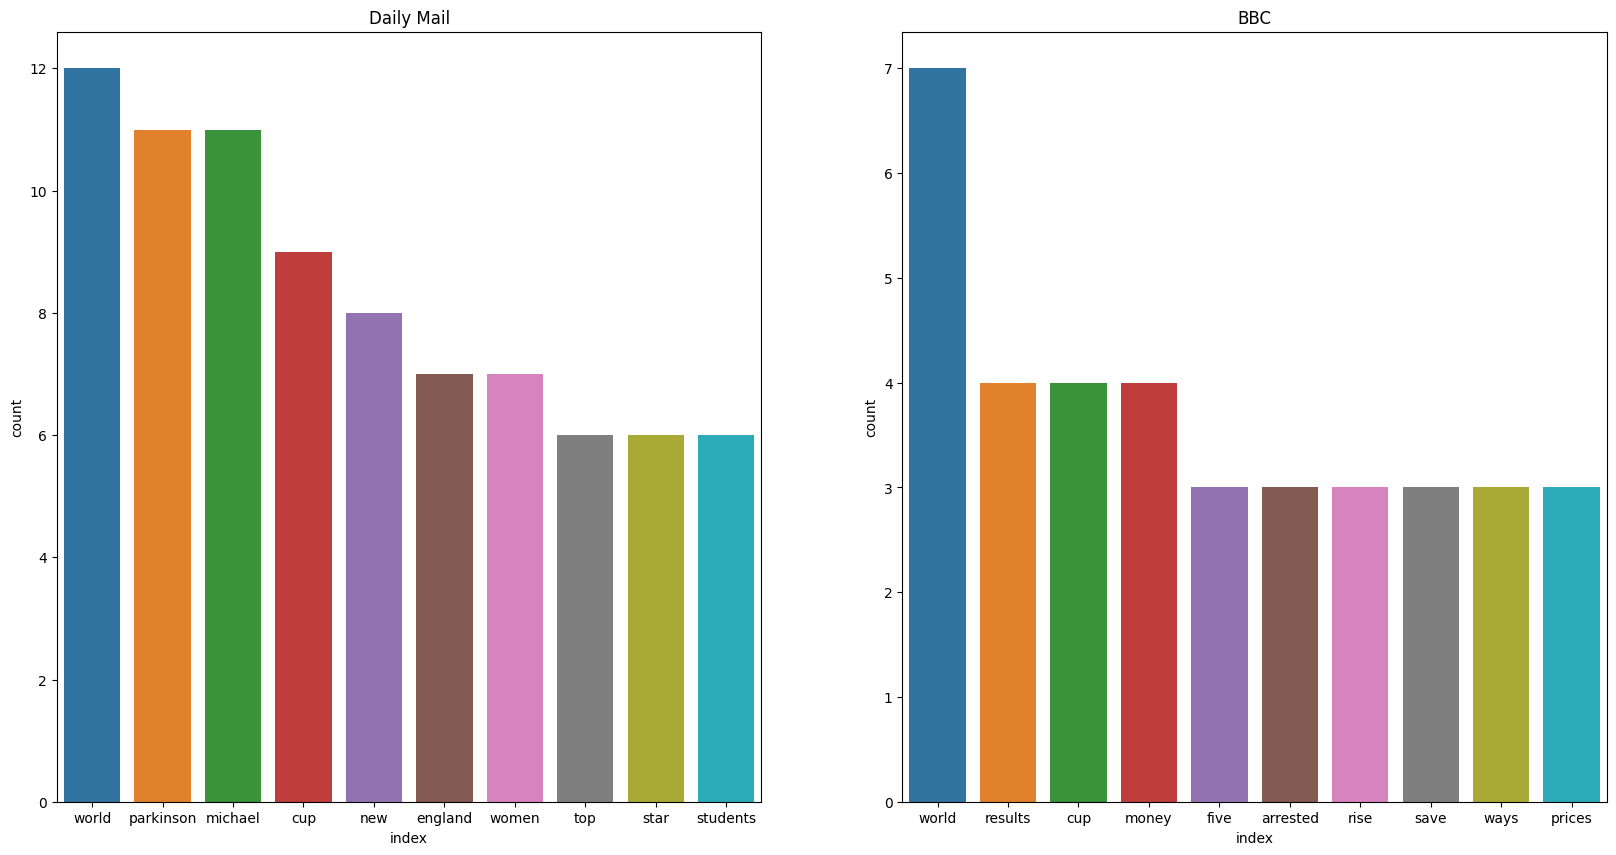

In [103]:
# Select the top ten of each

dm_top_ten = dm_keyword_counts.reset_index()[:10]
bbc_top_ten = bbc_keyword_counts.reset_index()[:10]

# Then graph them

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(dm_top_ten, x="index", y="count", ax=ax[0]).set(title='Daily Mail')
sns.barplot(bbc_top_ten, x="index", y="count", ax=ax[1]).set(title='BBC')